# @GRIP: The sparks foundation

## author: Chaabane Nawres

### Computer Vision & IOT

# Task1: 

#### Object detection:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

In [2]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [3]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [4]:
classlabels = []
file_name = 'Labels.txt'
with open(file_name,'rt') as fpt:
    classlabels = fpt.read().rstrip('\n').split('\n')

In [5]:
print(len(classlabels))
print (classlabels)


91
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [6]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

<dnn_Model 000001948A239E90>

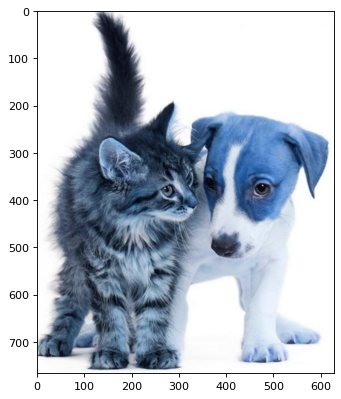

In [7]:
img = cv2.imread('cc.jpg')
figure(figsize=(8, 6), dpi=80)

plt.imshow(img)

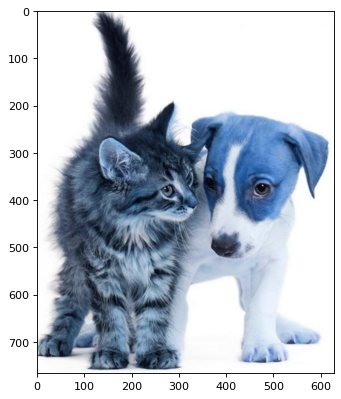

In [8]:
figure(figsize=(8, 6), dpi=80)
plt.imshow(img)

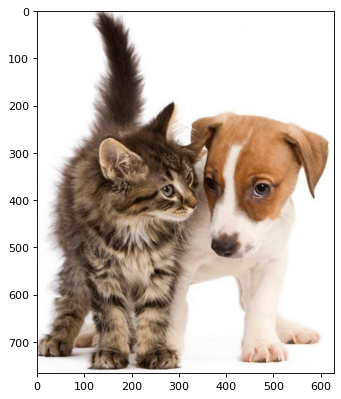

In [9]:
figure(figsize=(8, 6), dpi=80)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold =0.3)

In [11]:

font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten() ,confidence.flatten(), bbox) :
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classlabels[ClassInd- 1],(boxes[0]+10,boxes[1]+40), font, 2,(0,255,0), 2)

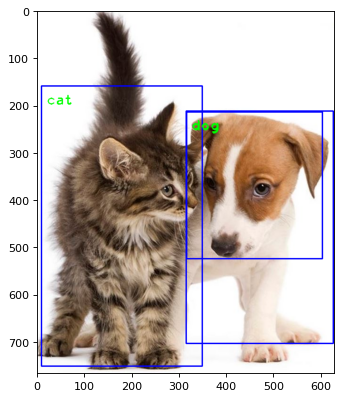

In [12]:
figure(figsize=(8, 6), dpi=80)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

#### Optical character recognition (ocr):

In [13]:
import easyocr

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\torchvision\io\image.py:11: UserWarning: Failed to load image Python extension: Could not find module 'C:\Users\HP\AppData\Local\Programs\Python\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.
  warn(f"Failed to load image Python extension: {e}")


In [14]:
imag= 'hop.png'
img1 = 'word.jpg'

In [15]:
Reader = easyocr.Reader(['en'],gpu=False)
result = Reader.readtext(imag)
result

Using CPU. Note: This module is much faster with a GPU.


[([[7, 76], [218, 76], [218, 144], [7, 144]], 'HOPE', 0.9043405652046204)]

In [16]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

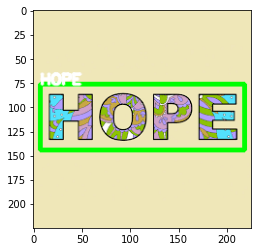

In [17]:
img = cv2.imread(imag)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

In [18]:
Reader = easyocr.Reader(['en'],gpu=False)
result = Reader.readtext(img1)
result

Using CPU. Note: This module is much faster with a GPU.


[([[223, 157], [413, 157], [413, 247], [223, 247]],
  'HARD',
  0.9940928220748901),
 ([[207, 254], [417, 254], [417, 346], [207, 346]], 'WORK', 0.995796799659729),
 ([[201, 353], [415, 353], [415, 445], [201, 445]],
  'BEATS',
  0.9994099709697349),
 ([[161, 449], [413, 449], [413, 541], [161, 541]],
  'TALENT .',
  0.8777154298350115),
 ([[324, 556], [408, 556], [408, 582], [324, 582]],
  'JAKE PAUL',
  0.9995764840224743)]

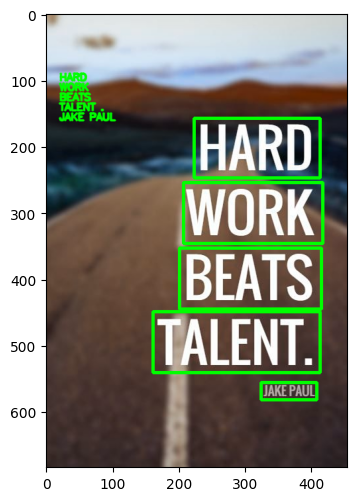

In [19]:
img = cv2.imread(img1)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
figure(figsize=(8, 6), dpi=100) 
plt.imshow(img)
plt.show()